# <center>**甲状腺疾病数据集分析**</center>

# 1.甲状腺疾病及机器学习在甲状腺疾病中的应用

&emsp;&emsp;甲状腺疾病（Thyroid disease）是指一些会影响甲状腺机能的症状。甲状腺位在颈部前方，会分泌甲状腺激素，透过血液来调整其他器官的机能，属于内分泌系统中的一部分。正常情形下，甲状腺激素会调节人体内的能量使用、婴儿及儿童的成长。

&emsp;&emsp;甲状腺疾病一般可分为五种，每一种都有其症状。也有可能一个人同时罹患这些疾病中的多种疾病：
1.甲状腺机能低下症是由于体内的游离甲状腺激素不足所造成。
2.甲状腺功能亢进症是由于体内的游离甲状腺激素过多所造成。
3.结构异常，多半是甲状腺肿（甲状腺的肿大）。
4.赘生物，可能是良性的，也可能是癌症。
5.甲状腺机能异常，但没有临床症状（亚临床甲状腺机能低下症、亚临床甲状腺功能亢进症）。

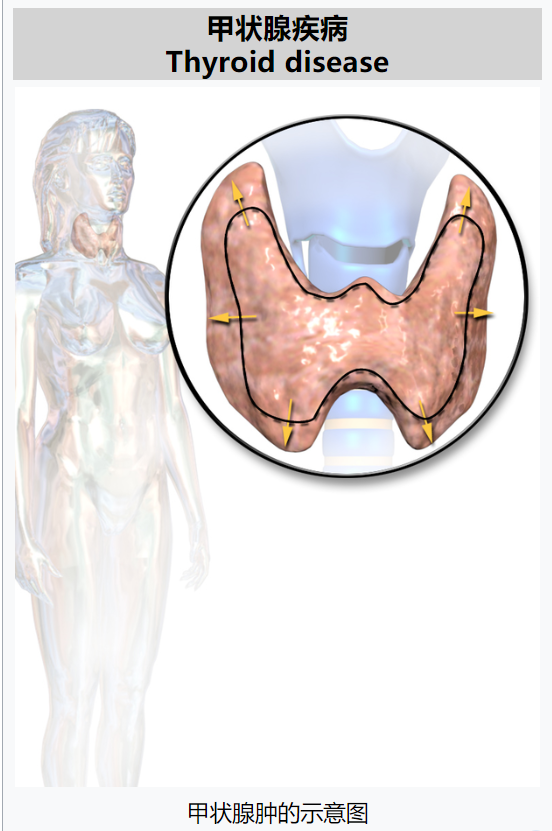

&emsp;&emsp;机器学习具有高效率、高准确性等诸多优点，它的快速发展与广泛应用给社会各领域带来了动力，机器学习和医学领域的结合已经成为当前热点之一。与其他疾病相比，机器学习在甲状腺肿瘤诊疗中的研究相对较少。根据现有研究结果，机器学习在甲状腺肿瘤超声诊断、细胞学诊断中具有较好的应用前景。然而甲状腺肿瘤的诊疗中还存在许多其他有待提高的方面，如影像诊断中CT及MRI的诊断价值、甲状腺滤泡状癌的诊断及甲状腺癌患者预后评价等。随着机器学习在甲状腺肿瘤诊疗中的应用不断扩展，或许其在未来可以在改善和提高甲状腺肿瘤的诊断、治疗及患者管理等许多方面发挥巨大作用。

# 2.数据集介绍

&emsp;&emsp;该甲状腺疾病的数据集是由澳大利亚的生物研究所——Garvan医学研究所的研究员Ross Quinlan提供的，这份数据集包括3772个病患，收集了病患的年龄、性别、甲状腺素含量、是否接受过甲状腺手术、是否有甲亢的临床表现、是否处于孕期、是否有肿瘤疾病、是否有甲状腺肿的临床表现等。

# 3.导入需要的库


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
plt.rcParams['font.sans-serif'] = [u'SimHei'] #画图时导入字体，能够显示中文字体
plt.rcParams['axes.unicode_minus'] = False #画图时导入字体，能够显示中文字体

# 4.导入数据集

In [2]:
thyroid_df = pd.read_csv('C:\\Users\\Jayson\\Desktop\\hypothyroid.csv')
thyroid_df.head() #查看数据集的前5行

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


&emsp;&emsp;从数据集的前五行可以直接清晰的看到该数据集收集到病患的信息。

# 5.数据清洗

In [3]:
thyroid_df.rename(columns={'binaryClass':'Label'},inplace=True)
thyroid_df.replace('?',np.nan,inplace=True)

&emsp;&emsp;去除一些不分析的标签。

In [4]:
thyroid_df.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

&emsp;&emsp;展示数据集所含的信息

In [5]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3771 non-null   object
 1   sex              3622 non-null   object
 2   sick             3772 non-null   object
 3   pregnant         3772 non-null   object
 4   thyroid surgery  3772 non-null   object
 5   I131 treatment   3772 non-null   object
 6   lithium          3772 non-null   object
 7   goitre           3772 non-null   object
 8   tumor            3772 non-null   object
 9   TSH              3403 non-null   object
 10  T3               3003 non-null   object
 11  TT4              3541 non-null   object
 12  T4U              3385 non-null   object
 13  FTI              3387 non-null   object
 14  Label            3772 non-null   object
dtypes: object(15)
memory usage: 442.2+ KB


In [6]:
thyroid_df['thyroid surgery'].value_counts()

f    3719
t      53
Name: thyroid surgery, dtype: int64

In [7]:
thyroid_df['thyroid surgery'].value_counts(normalize=True)

f    0.985949
t    0.014051
Name: thyroid surgery, dtype: float64

&emsp;&emsp;首先对患者之前是否接受过甲状腺手术进行分析，从结果可以看出大部分的患者之前并没有接受过甲状腺手术(占比为98.6%).

In [8]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
    thyroid_df[i] = pd.to_numeric(thyroid_df[i])

&emsp;&emsp;将参数类型数据转化为数字类型数据。

In [9]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   float64
 1   sex              3622 non-null   object 
 2   sick             3772 non-null   object 
 3   pregnant         3772 non-null   object 
 4   thyroid surgery  3772 non-null   object 
 5   I131 treatment   3772 non-null   object 
 6   lithium          3772 non-null   object 
 7   goitre           3772 non-null   object 
 8   tumor            3772 non-null   object 
 9   TSH              3403 non-null   float64
 10  T3               3003 non-null   float64
 11  TT4              3541 non-null   float64
 12  T4U              3385 non-null   float64
 13  FTI              3387 non-null   float64
 14  Label            3772 non-null   object 
dtypes: float64(6), object(9)
memory usage: 442.2+ KB


# 6.处理缺失值

In [10]:
thyroid_df.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Label                0
dtype: int64

&emsp;&emsp;从汇总的数据来看，缺失的数据较多，尤其是性别以及后续的其他数据。

&emsp;&emsp;对于后续的数据用fillna函数来补齐。用dropna函数去除前面的缺失值。

In [11]:
miss_cols = ['FTI','TSH','T3','TT4','T4U']
for i in miss_cols:
    thyroid_df[i] = thyroid_df[i].fillna(thyroid_df[i].mean())
thyroid_df.dropna(inplace=True)

In [12]:
thyroid_df.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Label              0
dtype: int64

&emsp;&emsp;再次查看缺失数据信息，发现所有缺失数据已被补全或者删除，整个数据集不存在缺失数据。

In [13]:
thyroid_df.TT4 = thyroid_df.TT4.astype(int)
thyroid_df.FTI = thyroid_df.FTI.astype(int)
thyroid_df.age = thyroid_df.age.astype(int)

# 7.数据集分析

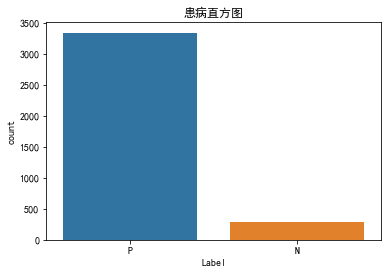

In [14]:
sns.countplot(x="Label",data=thyroid_df)
plt.title("患病直方图");

In [15]:
positive_df = thyroid_df[thyroid_df.Label=='P']

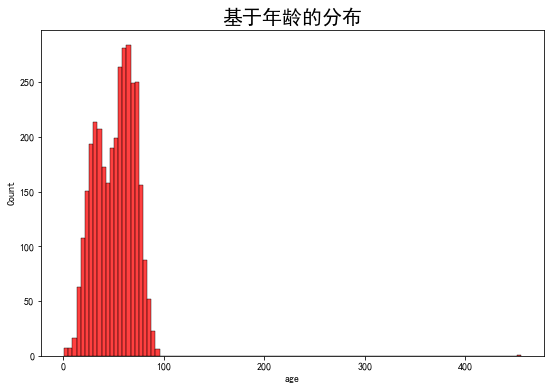

In [16]:
plt.figure(figsize=(9,6))
sns.histplot(x='age',data=positive_df,color='red')
plt.title("基于年龄的分布",{'fontsize':20});

&emsp;&emsp;从图中可以看出患甲状腺疾病的患者呈现出一个右偏的正态分布。大多集中在年轻人和中年人中。图中反应出来的结果与医学结论契合，例如一种较为出名的甲状腺疾病：甲亢，甲亢可发生于从新生儿到老年人的任何年龄，但多见于年轻人和中年人，高发年龄在20~50岁。

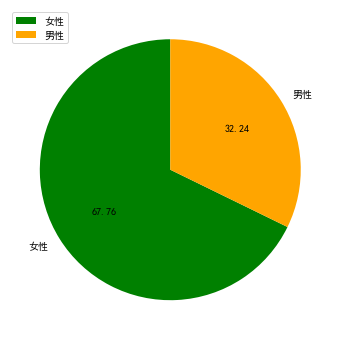

In [17]:
plt.figure(figsize=(8,6))
plt.pie(x=positive_df.sex.value_counts(),
        labels=['女性','男性'],
        startangle = 90,
        colors=['green','orange'],
        autopct='%.2f'
       );
plt.legend();

&emsp;&emsp;根据这个饼状图可以看出调查的这些人群中，女性患病的人数远高于男性，是男性的两倍左右。在医学中也是如此，甲亢女性多见，女性发病率为男性发病率的4~6倍。

# 8.将分类变量转化为数值型变量

In [18]:
X = thyroid_df.drop('Label',axis=1)
y = thyroid_df.Label
s_encoder = LabelEncoder()
si_encoder = LabelEncoder()
preg_encoder = LabelEncoder()
th_encoder = LabelEncoder()
treat_encoder = LabelEncoder()
lith_encoder = LabelEncoder()
g_encoder= LabelEncoder()
tu_encoder = LabelEncoder()
X['sex'] = s_encoder.fit_transform(X.sex)
X['I131 treatment'] = treat_encoder.fit_transform(X['I131 treatment'])
X['sick'] = si_encoder.fit_transform(X.sick)
X['pregnant'] = preg_encoder.fit_transform(X.pregnant)
X['thyroid surgery'] = th_encoder.fit_transform(X['thyroid surgery'])
X['lithium'] = lith_encoder.fit_transform(X['lithium'])
X['goitre'] = g_encoder.fit_transform(X['goitre'])
X['tumor'] = tu_encoder.fit_transform(X['tumor'])

In [19]:
def func(df):
    if df == 'P':
        return 1
    else:
        return 0

In [20]:
y = y.apply(func)

In [21]:
thyroid_df_corr = thyroid_df.corr()
thyroid_df_corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.045111,-0.220625,-0.037432,-0.157596,0.050689
TSH,-0.045111,1.000000,-0.156667,-0.268867,0.070838,-0.301969
T3,-0.220625,-0.156667,1.000000,0.511564,0.409006,0.311655
TT4,-0.037432,-0.268867,0.511564,1.000000,0.427231,0.780517
T4U,-0.157596,0.070838,0.409006,0.427231,1.000000,-0.171582
FTI,0.050689,-0.301969,0.311655,0.780517,-0.171582,1.000000


<AxesSubplot:>

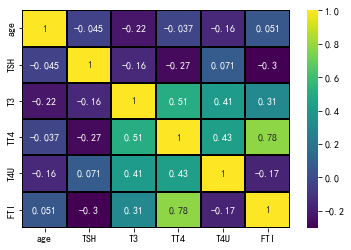

In [22]:
sns.heatmap(thyroid_df_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True)

# 9.将数据拆分为训练集数据和测试集数据

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [24]:
smote = SMOTE(random_state=11)

x_smote, y_smote = smote.fit_resample(X_train, y_train)

&emsp;&emsp;这一步是处理不平衡的数据，一些数据存在过度采样，导致数据出现不平衡。

# 10.标准化

In [25]:
scalr = MinMaxScaler()
x_smote.TT4 = scalr.fit_transform(x_smote[['TT4']])
x_smote.age = scalr.fit_transform(x_smote[['age']])
x_smote.FTI = scalr.fit_transform(x_smote[['FTI']])
X_test.TT4 = scalr.transform(X_test[['TT4']])
X_test.age = scalr.transform(X_test[['age']])
X_test.FTI = scalr.transform(X_test[['FTI']])

C:\Users\Jayson\.conda\envs\notebook\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- TT4
Feature names seen at fit time, yet now missing:
- FTI

  warnings.warn(message, FutureWarning)
C:\Users\Jayson\.conda\envs\notebook\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- age
Feature names seen at fit time, yet now missing:
- FTI

  warnings.warn(message, FutureWarning)


# 11.建立模型

In [26]:
models = {
    LogisticRegression(max_iter=500):'逻辑回归',
    SVC():"支持向量机",
    RandomForestClassifier():'随机森林'
}
for m in models.keys():
    m.fit(x_smote,y_smote)
for model,name in models.items():
     print(f"{name}模型准确性得分是: ",model.score(X_test,y_test)*100,"%")

逻辑回归模型准确性得分是:  97.93103448275862 %
支持向量机模型准确性得分是:  98.06896551724138 %
随机森林模型准确性得分是:  98.62068965517241 %


# 12.每个模型具体的报告

In [27]:
for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"{name}模型的具体报告")  
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------------------------------------")

逻辑回归模型的具体报告
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        59
           1       0.99      0.98      0.99       666

    accuracy                           0.98       725
   macro avg       0.92      0.95      0.93       725
weighted avg       0.98      0.98      0.98       725

----------------------------------------------------------
支持向量机模型的具体报告
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        59
           1       1.00      0.98      0.99       666

    accuracy                           0.98       725
   macro avg       0.91      0.98      0.94       725
weighted avg       0.98      0.98      0.98       725

----------------------------------------------------------
随机森林模型的具体报告
----------------------------------------------------------
              

In [28]:
rf = RandomForestClassifier()
rf.fit(x_smote,y_smote)
rf.score(X_test,y_test)

0.9875862068965517

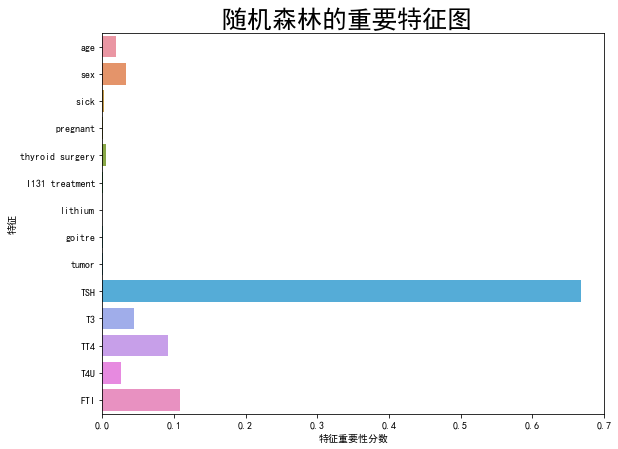

In [29]:
plt.figure(figsize=(9,7))
feature_imp1 = rf.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('特征重要性分数')
plt.ylabel('特征')
plt.title("随机森林的重要特征图 ",{'fontsize':25})
plt.show();

In [30]:
x_smote.drop(['sick', 'pregnant', 'I131 treatment',
              'lithium', 'goitre', 'tumor'], axis=1, inplace=True)
X_test.drop(['sick', 'pregnant', 'I131 treatment',
              'lithium', 'goitre', 'tumor'], axis=1, inplace=True)

In [31]:
new_rf = RandomForestClassifier()
new_rf.fit(x_smote,y_smote)
new_rf.score(X_test,y_test)

0.9848275862068966

# 13.结论

&emsp;&emsp;甲状腺肿瘤是一种常见疾病，其中良性肿瘤占绝大多数。流行病学研究显示，甲状腺恶性肿瘤发病率逐年提高。随着诊断技术的发展，高质量的影像及病理资料获取已不再困难，高效而准确的判读结果才是提高诊断水平的关键。随着患者数量的增多，甲状腺肿瘤患者的治疗决策及随访管理等均存在着巨大的挑战。机器学习因其具备高效率、较高准确率等特点而成为医学领域的研究热点之一。目前已有研究肯定了其在甲状腺肿瘤诊疗中的作用。正确全面地了解机器学习及其在甲状腺肿瘤诊疗中的作用可以为提高诊断准确性，指导治疗决策和改善患者管理提供新思路。